In [1]:
#随机森林
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn import feature_selection
from sklearn.feature_selection import SelectFromModel
from scipy.io import loadmat
from sklearn.model_selection import cross_val_score
import seaborn as sns #导入包
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import ADASYN
import collections
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

In [2]:
file = r'./Data_set/win_9_overlap_4.5.mat'
data = loadmat(file, mat_dtype=True)
motion_py1 = data['out_feature']
x = motion_py1[:,0:180]
y = motion_py1[:,180]
y = y.astype(int)
y.shape

(39648,)

In [3]:
sa_num = collections.Counter(y)
sa_num[0], sa_num[1]

(36666, 2982)

# Generate ID and Time

In [4]:
all_ID = np.ones(shape = x.shape, dtype = 'int')
all_time = np.ones(shape = x.shape, dtype = 'int')
tmp_time = np.array(range(180))
tmp_time = tmp_time.reshape(1,180)
tmp_time = tmp_time.astype(int)
for i in range(x.shape[0]):
  all_ID[i,:] = all_ID[i,:] * (i + 1)
  all_time[i,:] = tmp_time

all_time, all_ID

(array([[  0,   1,   2, ..., 177, 178, 179],
        [  0,   1,   2, ..., 177, 178, 179],
        [  0,   1,   2, ..., 177, 178, 179],
        ...,
        [  0,   1,   2, ..., 177, 178, 179],
        [  0,   1,   2, ..., 177, 178, 179],
        [  0,   1,   2, ..., 177, 178, 179]]),
 array([[    1,     1,     1, ...,     1,     1,     1],
        [    2,     2,     2, ...,     2,     2,     2],
        [    3,     3,     3, ...,     3,     3,     3],
        ...,
        [39646, 39646, 39646, ..., 39646, 39646, 39646],
        [39647, 39647, 39647, ..., 39647, 39647, 39647],
        [39648, 39648, 39648, ..., 39648, 39648, 39648]]))

In [5]:
x = x.reshape(x.size, 1)
all_ID = all_ID.reshape(all_ID.size, 1)
all_time = all_time.reshape(all_time.size, 1)
all_ID, all_time

(array([[    1],
        [    1],
        [    1],
        ...,
        [39648],
        [39648],
        [39648]]),
 array([[  0],
        [  1],
        [  2],
        ...,
        [177],
        [178],
        [179]]))

# Merge into Dataframe

In [6]:
all_array = np.c_[all_ID, all_time, x]

kind = ['id', 'time', 'Radar']
dtypes ={'id' : int, 'time' : int, 'Radar' : float}
timeseries = pd.DataFrame(all_array, columns = kind)  #将矩阵转化为 DataFrame
timeseries = timeseries.astype(dtypes)
timeseries

,id,time,Radar
0,1,0,344.723364
1,1,1,344.989239
2,1,2,344.992129
3,1,3,344.960363
4,1,4,345.067635
...,...,...,...
7136635,39648,175,-950.925313
7136636,39648,176,-952.251582
7136637,39648,177,-957.265866
7136638,39648,178,-959.357072


# get tsfresh features

In [7]:
extracted_features = extract_features(timeseries, column_id='id', column_sort='time')
extracted_features

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 70/70 [05:10<00:00,  4.44s/it]


,Radar__variance_larger_than_standard_deviation,Radar__has_duplicate_max,Radar__has_duplicate_min,Radar__has_duplicate,Radar__sum_values,Radar__abs_energy,Radar__mean_abs_change,Radar__mean_change,Radar__mean_second_derivative_central,Radar__median,...,Radar__permutation_entropy__dimension_6__tau_1,Radar__permutation_entropy__dimension_7__tau_1,Radar__query_similarity_count__query_None__threshold_0.0,"Radar__matrix_profile__feature_""min""__threshold_0.98","Radar__matrix_profile__feature_""max""__threshold_0.98","Radar__matrix_profile__feature_""mean""__threshold_0.98","Radar__matrix_profile__feature_""median""__threshold_0.98","Radar__matrix_profile__feature_""25""__threshold_0.98","Radar__matrix_profile__feature_""75""__threshold_0.98",Radar__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,0.0,0.0,61999.270642,2.135514e+07,0.126592,0.003017,-0.000519,344.593232,...,4.778897,5.055482,NaN,0.805621,2.960177,1.522069,1.364633,1.122896,1.892225,345.520288
2,0.0,0.0,0.0,0.0,61994.952178,2.135216e+07,0.131253,0.000230,-0.000211,344.593232,...,4.681906,4.971748,NaN,0.652862,3.097711,1.541670,1.369126,1.095544,1.972853,345.455015
3,0.0,0.0,0.0,0.0,61991.921819,2.135008e+07,0.131374,0.000288,-0.001335,344.521909,...,4.649006,4.944839,NaN,0.717155,3.293372,1.677614,1.563422,1.100889,2.119666,345.479647
4,0.0,0.0,0.0,0.0,61968.608314,2.133405e+07,0.138212,0.001473,-0.000417,344.468146,...,4.662282,4.917366,NaN,1.130865,6.131107,2.276099,1.986172,1.524504,2.767514,345.411529
5,0.0,0.0,0.0,0.0,61981.553836,2.134296e+07,0.145709,0.000637,0.000125,344.619429,...,4.762006,4.998657,NaN,0.673335,2.968925,1.445357,1.305989,0.981301,1.845782,345.309571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39644,0.0,0.0,0.0,0.0,-172270.988170,1.648740e+08,0.093831,0.000078,-0.000665,-957.412829,...,3.973781,4.197511,NaN,1.692396,11.545646,4.788223,2.629841,2.480805,7.633193,958.122935
39645,0.0,0.0,0.0,0.0,-172304.577433,1.649382e+08,0.095209,0.009493,-0.000193,-957.508772,...,4.045923,4.256972,NaN,1.675988,11.305327,6.214459,5.292807,2.904064,10.110188,958.122935
39646,0.0,0.0,0.0,0.0,-172241.405792,1.648174e+08,0.089292,0.011111,0.000224,-957.165581,...,3.862030,4.133038,NaN,1.758289,8.937125,4.353551,3.868714,2.229961,6.339627,957.972270
39647,0.0,0.0,0.0,0.0,-172166.818996,1.646747e+08,0.090050,0.000552,-0.000061,-956.430449,...,3.877912,4.153144,NaN,1.850754,13.573123,7.036146,5.421953,2.816776,12.354671,957.950421


In [8]:
impute(extracted_features)
features_filtered = select_features(extracted_features, y)
features_filtered

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['Radar__fft_coefficient__attr_"real"__coeff_91'
 'Radar__fft_coefficient__attr_"real"__coeff_92'
 'Radar__fft_coefficient__attr_"real"__coeff_93'
 'Radar__fft_coefficient__attr_"real"__coeff_94'
 'Radar__fft_coefficient__attr_"real"__coeff_95'
 'Radar__fft_coefficient__attr_"real"__coeff_96'
 'Radar__fft_coefficient__attr_"real"__coeff_97'
 'Radar__fft_coefficient__attr_"real"__coeff_98'
 'Radar__fft_coefficient__attr_"real"__coeff_99'
 'Radar__fft_coefficient__attr_"imag"__coeff_91'
 'Radar__fft_coefficient__attr_"imag"__coeff_92'
 'Radar__fft_coefficient__attr_"imag"__coeff_93'
 'Radar__fft_coefficient__attr_"imag"__coeff_94'
 'Radar__fft_coefficient__attr_"imag"__coeff_95'
 'Radar__fft_coefficient__attr_"imag"__coeff_96'
 'Radar__fft_coefficient__attr_"imag"__coeff_97'
 'Radar__fft_coefficient__attr_"imag"__coeff_98'
 'Radar__fft_coefficient__attr_"i

,"Radar__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.4","Radar__matrix_profile__feature_""min""__threshold_0.98",Radar__permutation_entropy__dimension_7__tau_1,Radar__number_peaks__n_3,Radar__cid_ce__normalize_True,"Radar__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""","Radar__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""min""","Radar__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""max""","Radar__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""","Radar__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""min""",...,Radar__ar_coefficient__coeff_4__k_10,"Radar__fft_coefficient__attr_""imag""__coeff_54","Radar__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.2","Radar__fft_coefficient__attr_""angle""__coeff_25","Radar__fft_coefficient__attr_""angle""__coeff_33","Radar__fft_coefficient__attr_""angle""__coeff_37","Radar__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""","Radar__agg_linear_trend__attr_""rvalue""__chunk_len_50__f_agg_""max""","Radar__fft_coefficient__attr_""angle""__coeff_31",Radar__number_crossing_m__m_1
1,0.002801,0.805621,5.055482,18.0,3.114944,0.031166,0.033205,0.029886,0.010983,0.011185,...,0.116066,-0.975896,0.000979,46.542750,-153.956918,118.125281,-0.016704,-0.784430,-131.061324,0.0
2,0.005725,0.652862,4.971748,15.0,3.215946,0.030518,0.032195,0.029663,0.010766,0.010783,...,0.068591,-0.641748,0.001620,-109.217994,12.757417,-50.141762,-0.005266,-0.741553,-35.768869,0.0
3,0.008112,0.717155,4.944839,16.0,3.160299,0.031242,0.033633,0.030505,0.011073,0.011133,...,0.004549,0.000410,0.006584,171.644152,41.498471,63.714048,-0.008421,0.128835,-21.267323,0.0
4,0.007483,1.130865,4.917366,14.0,2.816224,0.037242,0.039378,0.035312,0.013098,0.013196,...,-0.184342,-0.076108,0.006980,52.667453,-144.673877,95.698076,0.000651,-0.133944,56.360606,0.0
5,0.004124,0.673335,4.998657,17.0,3.088922,0.033756,0.034547,0.029556,0.011900,0.011896,...,-0.130481,0.060085,0.004982,-49.155214,61.246016,-152.585680,0.019889,-0.374547,-157.251158,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39644,0.005575,1.692396,4.197511,9.0,1.664256,0.035750,0.034344,0.037343,0.012667,0.012404,...,0.242862,-0.282406,0.004330,103.557342,11.513597,-123.639391,-0.053634,-0.839059,-23.148647,0.0
39645,0.002413,1.675988,4.256972,13.0,2.146530,0.033343,0.028767,0.037789,0.011804,0.011336,...,0.070142,0.537750,0.012647,162.793655,143.715319,74.266340,0.000934,0.030693,107.017074,0.0
39646,0.005084,1.758289,4.133038,11.0,1.628261,0.039223,0.035453,0.041678,0.013790,0.013365,...,0.067023,0.639572,0.007298,90.576204,148.179640,128.949403,0.032334,0.634739,137.668457,0.0
39647,0.005658,1.850754,4.153144,5.0,1.547676,0.039715,0.035630,0.041249,0.013961,0.013509,...,0.081315,-0.274810,0.002210,-144.003084,-6.855404,33.016127,0.046930,0.865613,-42.470488,0.0


In [9]:
features=features_filtered.values
X_train_a, X_test, y_train_a, y_test = train_test_split(features, y, test_size = 0.25, random_state = 0)
X_train,y_train = ADASYN().fit_resample(X_train_a,y_train_a)

# Random Forest

[[8953  240]
 [ 202  517]]
Accuracy: 0.955407586763519
Sensitivity: 0.7190542420027817
Specificity: 0.9738931795931687


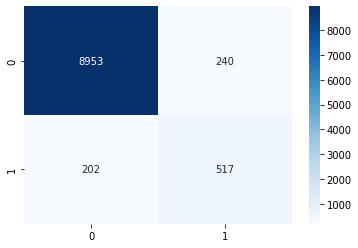

Test accuracy: 0.955408
Kappa: 0.676469
F1-score: 0.838226


In [10]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, class_weight="balanced")
classifier.fit(X_train, y_train)
importances=classifier.feature_importances_
indices=np.argsort(importances)[::-1]
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
print('Accuracy:',(TP+TN) / float(TP+TN+FP+FN))
print('Sensitivity:',TP / float(TP+FN))
print('Specificity:',TN / float(TN+FP))


df=pd.DataFrame(cm)
sns.heatmap(df,fmt='g',annot=True,cmap='Blues')
plt.show()
accuracy = metrics.accuracy_score(y_test, y_pred)  # 计算准确度
kappa = metrics.cohen_kappa_score(y_test, y_pred)  # 计算kappa
f1_score = metrics.f1_score(y_test, y_pred, average='macro')
print("Test accuracy: {:.6f}".format(accuracy))
print("Kappa: {:.6f}".format(kappa))
print("F1-score: {:.6f}".format(f1_score))

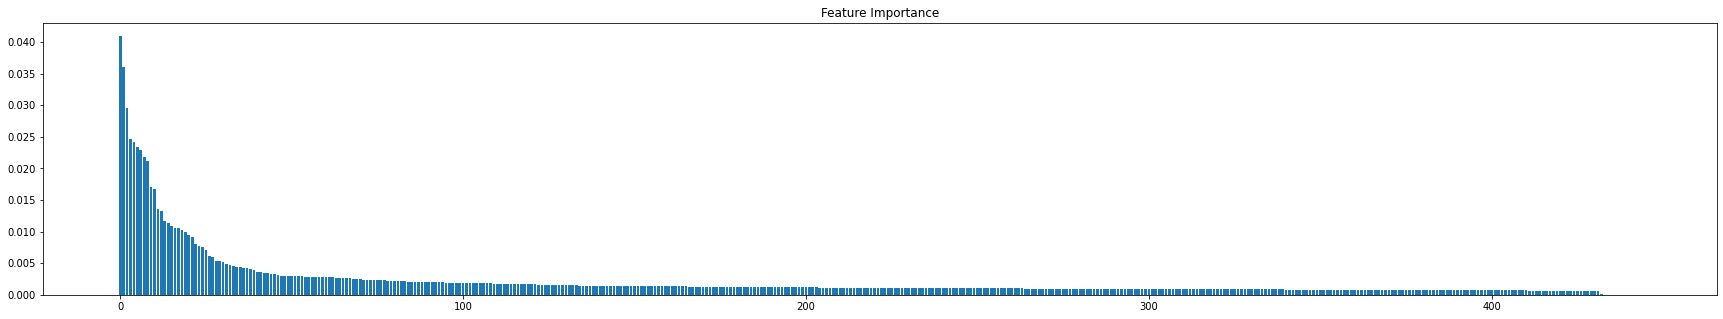

In [11]:
names = [features_filtered.columns[i] for i in indices]
plt.figure(figsize=(30,5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.show()

# KNN

[[7705 1488]
 [ 244  475]]
Accuracy: 0.8252623083131557
Sensitivity: 0.6606397774687065
Specificity: 0.838137713477646


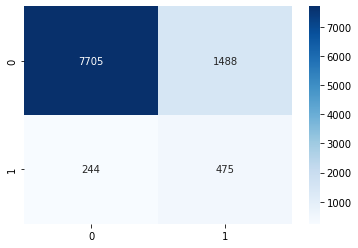

Test accuracy: 0.825262
Kappa: 0.277495
F1-score: 0.626587


In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
print('Accuracy:',(TP+TN) / float(TP+TN+FP+FN))
print('Sensitivity:',TP / float(TP+FN))
print('Specificity:',TN / float(TN+FP))


df=pd.DataFrame(cm)
sns.heatmap(df,fmt='g',annot=True,cmap='Blues')
plt.show()
accuracy = metrics.accuracy_score(y_test, y_pred)  # 计算准确度
kappa = metrics.cohen_kappa_score(y_test, y_pred)  # 计算kappa
f1_score = metrics.f1_score(y_test, y_pred, average='macro')
print("Test accuracy: {:.6f}".format(accuracy))
print("Kappa: {:.6f}".format(kappa))
print("F1-score: {:.6f}".format(f1_score))

# SVM

[[6396 2797]
 [ 559  160]]
Accuracy: 0.6614205004035513
Sensitivity: 0.22253129346314326
Specificity: 0.6957467638420537


D:\Anaconda3\envs\tf28\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


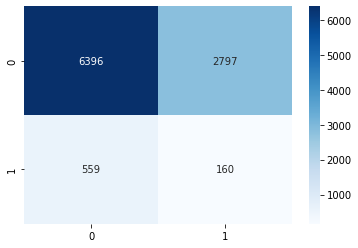

Test accuracy: 0.661421
Kappa: -0.033567
F1-score: 0.439612


In [13]:
classifier=svm.LinearSVC()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
print('Accuracy:',(TP+TN) / float(TP+TN+FP+FN))
print('Sensitivity:',TP / float(TP+FN))
print('Specificity:',TN / float(TN+FP))


df=pd.DataFrame(cm)
sns.heatmap(df,fmt='g',annot=True,cmap='Blues')
plt.show()
accuracy = metrics.accuracy_score(y_test, y_pred)  # 计算准确度
kappa = metrics.cohen_kappa_score(y_test, y_pred)  # 计算kappa
f1_score = metrics.f1_score(y_test, y_pred, average='macro')
print("Test accuracy: {:.6f}".format(accuracy))
print("Kappa: {:.6f}".format(kappa))
print("F1-score: {:.6f}".format(f1_score))